In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

### EDA

In [ ]:
# Reading the Training Data from Kaggle
df = pd.read_csv("/kaggle/input/123ofai-predict-the-traffic-volume/train_set_dirty.csv")

In [2]:
# Reading the Training Data from local
df = pd.read_csv("train_set_dirty.csv") #,keep_default_na=False)

In [3]:
# 1. Displaying the first 10 records
df.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1493.0,NaN,287.15,0.00,0.0,90.0,Mist,NaN,18-09-2017 22:00
1,NaN,NaN,282.25,0.00,0.0,90.0,Clouds,overcast clouds,23-05-2013 11:00
2,NaN,NaN,NaN,0.00,0.0,90.0,Drizzle,drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,0.00,0.0,20.0,Haze,haze,04-01-2017 08:00
4,5357.0,NaN,291.25,1.02,0.0,NaN,Rain,moderate rain,13-06-2013 13:00
5,2827.0,NaN,272.79,0.00,0.0,90.0,NaN,snow,03-11-2017 20:00
6,NaN,NaN,292.61,0.00,0.0,8.0,Clear,sky is clear,08-06-2016 23:00
7,4513.0,NaN,270.84,0.00,0.0,75.0,Clouds,broken clouds,01-03-2017 10:00
8,3415.0,NaN,297.97,0.00,0.0,40.0,Clouds,scattered clouds,03-07-2016 13:00
9,1883.0,NaN,272.55,0.00,0.0,1.0,Fog,fog,26-11-2016 08:00


In [4]:
df.replace('','NaN',regex=True,inplace=True)

In [5]:
df.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1493.0,NaN,287.15,0.00,0.0,90.0,Mist,NaN,18-09-2017 22:00
1,NaN,NaN,282.25,0.00,0.0,90.0,Clouds,overcast clouds,23-05-2013 11:00
2,NaN,NaN,NaN,0.00,0.0,90.0,Drizzle,drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,0.00,0.0,20.0,Haze,haze,04-01-2017 08:00
4,5357.0,NaN,291.25,1.02,0.0,NaN,Rain,moderate rain,13-06-2013 13:00
5,2827.0,NaN,272.79,0.00,0.0,90.0,NaN,snow,03-11-2017 20:00
6,NaN,NaN,292.61,0.00,0.0,8.0,Clear,sky is clear,08-06-2016 23:00
7,4513.0,NaN,270.84,0.00,0.0,75.0,Clouds,broken clouds,01-03-2017 10:00
8,3415.0,NaN,297.97,0.00,0.0,40.0,Clouds,scattered clouds,03-07-2016 13:00
9,1883.0,NaN,272.55,0.00,0.0,1.0,Fog,fog,26-11-2016 08:00


In [6]:
# 2. Check dataset info - field types, non-null values, dtypes
df.info()

"There are No Null Values"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       34748 non-null  float64
 1   holiday              42 non-null     object 
 2   temp                 34754 non-null  float64
 3   rain_1h              34860 non-null  float64
 4   snow_1h              34733 non-null  float64
 5   clouds_all           34659 non-null  float64
 6   weather_main         34654 non-null  object 
 7   weather_description  34751 non-null  object 
 8   date_time            34683 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


'There are No Null Values'

### Changing Data Types for all required columns

In [7]:
df.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [8]:
df['traffic_volume'].apply(pd.to_numeric)#, 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
#'weather_main', 'weather_description']]

0        1493.0
1           NaN
2           NaN
3        5626.0
4        5357.0
          ...  
38558    4727.0
38559    5697.0
38560    3009.0
38561     295.0
38562     746.0
Name: traffic_volume, Length: 38563, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       34748 non-null  float64
 1   holiday              42 non-null     object 
 2   temp                 34754 non-null  float64
 3   rain_1h              34860 non-null  float64
 4   snow_1h              34733 non-null  float64
 5   clouds_all           34659 non-null  float64
 6   weather_main         34654 non-null  object 
 7   weather_description  34751 non-null  object 
 8   date_time            34683 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


# Exploratory Data Analysis

#### Holiday

In [10]:
# Holiday Column
df['holiday'].value_counts()

holiday
New Years Day                5
Columbus Day                 5
Christmas Day                5
Veterans Day                 5
Memorial Day                 4
Martin Luther King Jr Day    4
Thanksgiving Day             4
Labor Day                    3
State Fair                   3
Independence Day             2
Washingtons Birthday         2
Name: count, dtype: int64

In [11]:
#The nunique() function in Pandas returns a series with several distinct → observations in a column.
df['holiday'].nunique()

11

In [12]:
df['holiday'].unique()

array([nan, 'New Years Day', 'Memorial Day', 'Columbus Day',
       'Martin Luther King Jr Day', 'Christmas Day', 'Thanksgiving Day',
       'Labor Day', 'Veterans Day', 'Independence Day',
       'Washingtons Birthday', 'State Fair'], dtype=object)

In [13]:
df_nan_holiday= df.loc[df.holiday =='NaN']
df_nan_holiday.value_counts()

Series([], Name: count, dtype: int64)

In [14]:
df['holiday'].isnull().sum()

38521

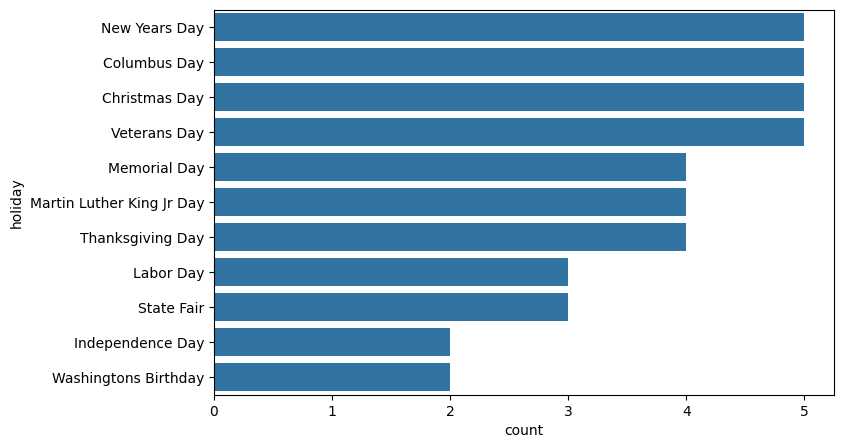

In [15]:
holidays = df.loc[df.holiday !='NaN']
#holidays.head(10)
plt.figure(figsize=(8,5))
sns.countplot(y='holiday', data= holidays, order = holidays['holiday'].value_counts().index)
plt.show()


In [16]:
holidays.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1493.0,NaN,287.15,0.00,0.0,90.0,Mist,NaN,18-09-2017 22:00
1,NaN,NaN,282.25,0.00,0.0,90.0,Clouds,overcast clouds,23-05-2013 11:00
2,NaN,NaN,NaN,0.00,0.0,90.0,Drizzle,drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,0.00,0.0,20.0,Haze,haze,04-01-2017 08:00
4,5357.0,NaN,291.25,1.02,0.0,NaN,Rain,moderate rain,13-06-2013 13:00
5,2827.0,NaN,272.79,0.00,0.0,90.0,NaN,snow,03-11-2017 20:00
6,NaN,NaN,292.61,0.00,0.0,8.0,Clear,sky is clear,08-06-2016 23:00
7,4513.0,NaN,270.84,0.00,0.0,75.0,Clouds,broken clouds,01-03-2017 10:00
8,3415.0,NaN,297.97,0.00,0.0,40.0,Clouds,scattered clouds,03-07-2016 13:00
9,1883.0,NaN,272.55,0.00,0.0,1.0,Fog,fog,26-11-2016 08:00


Creating conditional box plots of the variable ‘no_holidays’ and of the variable ‘holidays’ in
combination with our target variable (Traffic_volume).

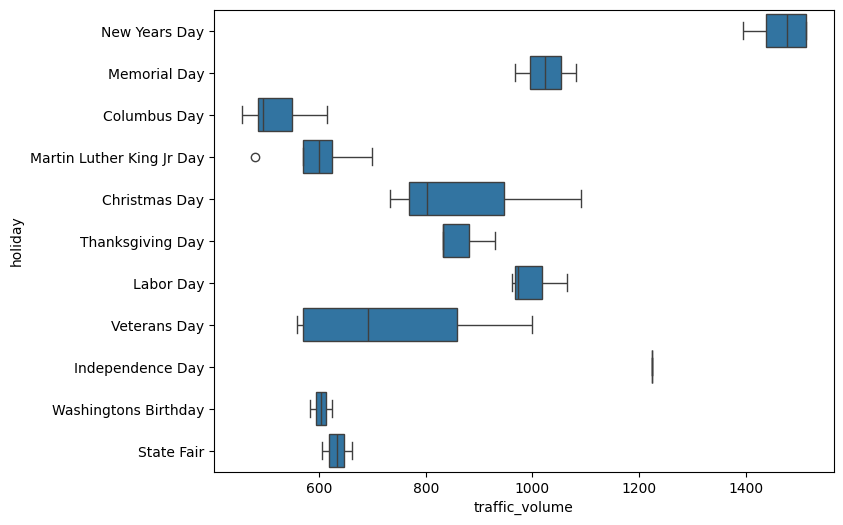

In [17]:
no_holidays = df.loc[df.holiday =='NaN']
#no_holidays.head()
plt.figure(figsize=(8,6))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()


The distribution of the traffic volume during the public holidays has on average low values.
There is an exception: “New Years Day” is a holiday that reaches very high traffic volume.

#### Temperature

In [18]:
df['temp'].describe()

count    34754.000000
mean       281.164396
std         13.534323
min          0.000000
25%        272.150000
50%        282.420000
75%        291.770000
max        308.430000
Name: temp, dtype: float64

In [19]:
df['temp'].nunique()


5552

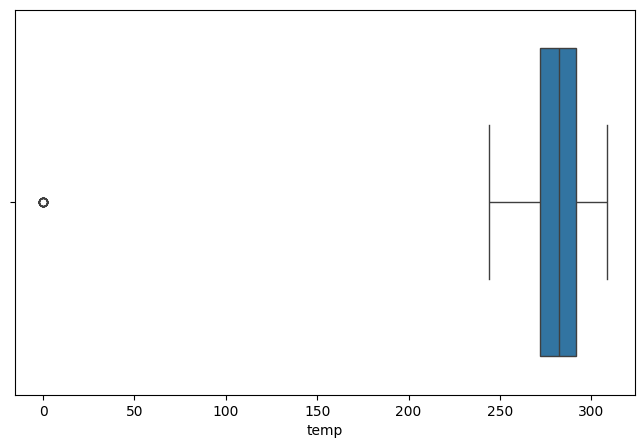

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='temp', data = df)
plt.show()

Temperature feature has an anamoly value around 0. Such observation can be a reading from a
faulty sensor. I will eliminate in the data processing phase.

#### rain_1h

In [21]:
df['rain_1h'].describe()

count    34860.000000
mean         0.414656
std         52.665546
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_1h, dtype: float64

In [22]:
df['rain_1h'].nunique()

342

<Axes: xlabel='rain_1h'>

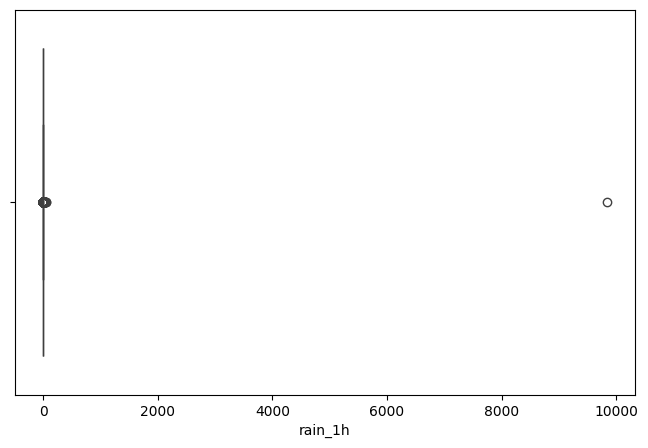

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='rain_1h', data = df)

The boxplot reveals an outlier value approximately at 10000. Also in this case we will have to remove
it during the pre-processing.

#### Snow_1h

In [24]:
df['snow_1h'].describe()


count    34733.000000
mean         0.000242
std          0.008662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_1h, dtype: float64

In [25]:
df['snow_1h'].nunique()

11

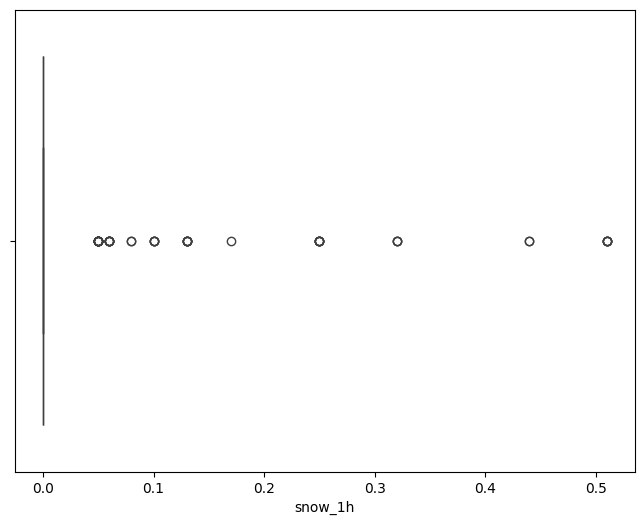

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='snow_1h', data=df)
plt.show()

#### Clouds_all

In [27]:
df['clouds_all'].describe()

count    34659.000000
mean        49.472605
std         39.013199
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64

In [28]:
df['clouds_all'].nunique()

60

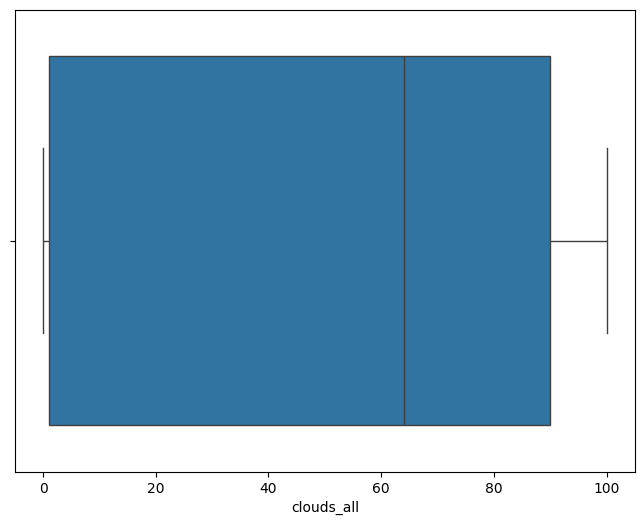

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x='clouds_all', data=df)
plt.show()

#### Weather_main

In [30]:
df['weather_main'].describe()

count      34654
unique        11
top       Clouds
freq       10938
Name: weather_main, dtype: object

In [31]:
df['weather_main'].nunique()

11

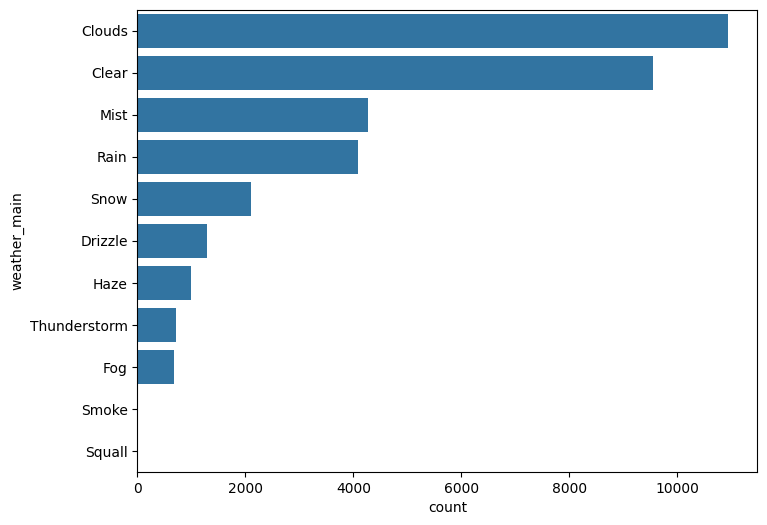

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(y='weather_main', data= df, order =df['weather_main'].value_counts().index)
plt.show()

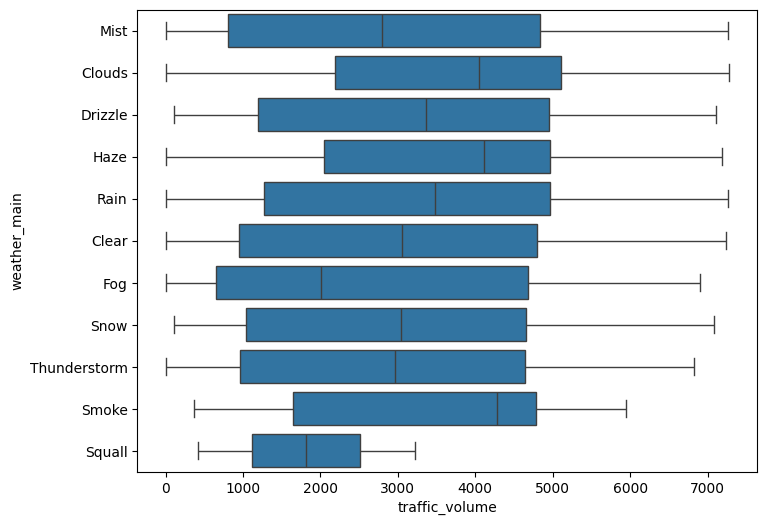

In [33]:
#Exploring traffic volume on weather
plt.figure(figsize=(8,6))
sns.boxplot(y='weather_main',x='traffic_volume', data = df)
plt.show()

Among the various types of weather, the ones that have on average lower traffic volumes are ‘Squall’
and ‘Fog’. The weather for which are registered, on average, major traffic volumes are 'Smoke', ‘Clouds’ and ‘Haze’.

#### Weather_description

In [34]:
df['weather_description'].value_counts()

weather_description
sky is clear                           8335
mist                                   4339
overcast clouds                        3702
broken clouds                          3318
scattered clouds                       2496
light rain                             2414
few clouds                             1423
light snow                             1396
Sky is Clear                           1238
moderate rain                          1230
haze                                    993
light intensity drizzle                 744
fog                                     661
proximity thunderstorm                  487
drizzle                                 478
heavy snow                              457
heavy intensity rain                    341
snow                                    221
proximity shower rain                   105
thunderstorm                             82
heavy intensity drizzle                  50
thunderstorm with heavy rain             45
proximity th

The categories ‘sky is clear’ and ‘Sky is Clear’ mean the same. This needs to be recoded into same
category.

In [35]:
df['weather_description'].nunique()

38

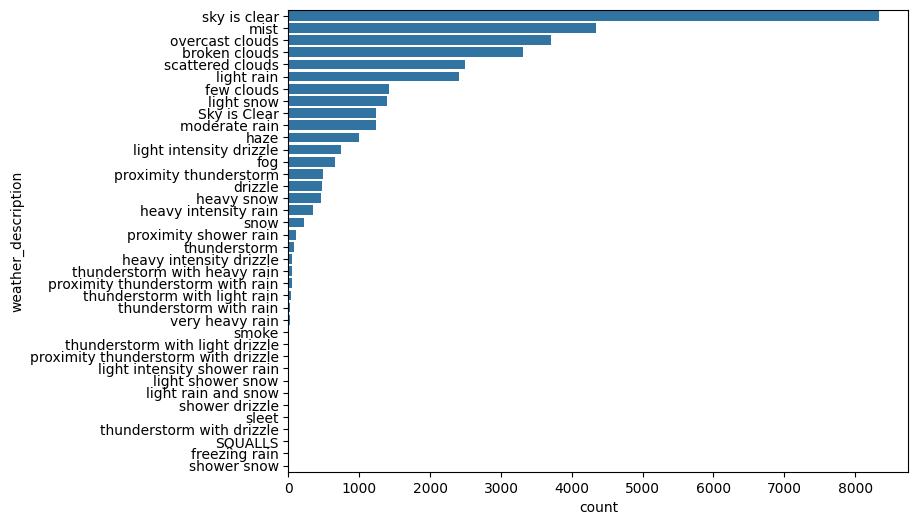

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(y='weather_description', data= df, order = df['weather_description'].value_counts().index)
plt.show()

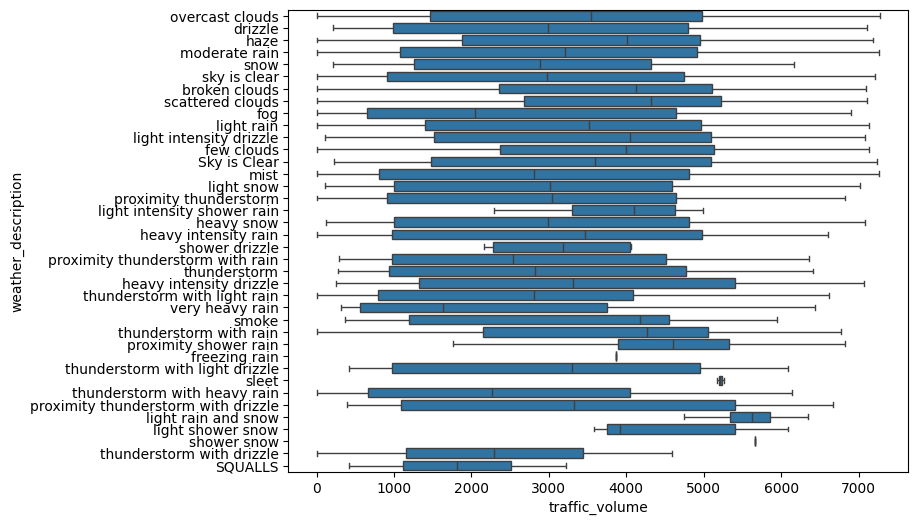

In [37]:
#Exploring traffic volume on holidays
plt.figure(figsize=(8,6))
sns.boxplot(y='weather_description',x='traffic_volume', data = df)
plt.show()

We can remove this variable because the information we could get from it was not strictly
necessary, given the variable ‘Weather_main’ which effectively summarizes the temporal states of
the data.


#### Date_time

In [38]:
df['date_time'].astype('datetime64[ns]')
# df['date_time'].isna().sum()
# df['date_time'].dtypes

0       2017-09-18 22:00:00
1       2013-05-23 11:00:00
2       2016-06-04 01:00:00
3       2017-01-04 08:00:00
4       2013-06-13 13:00:00
                ...        
38558   2017-01-14 16:00:00
38559                   NaT
38560   2014-02-07 22:00:00
38561   2017-04-09 04:00:00
38562   2013-05-01 04:00:00
Name: date_time, Length: 38563, dtype: datetime64[ns]

In [39]:
df['date_time'].astype('datetime64[ns]').min(),df['date_time'].astype('datetime64[ns]').max()

(Timestamp('2012-10-02 09:00:00'), Timestamp('2018-09-30 23:00:00'))

The collected data cover a period of 7 years. Thanks to pandas’ dtypes function, we know that the
date_time variable is still in the object type. So we need to convert it to datetime type. From this
feature we can get a lot of information.

#### Traffic_volume

In [40]:
df['traffic_volume'].describe()

count    34748.000000
mean      3254.207753
std       1987.318504
min          0.000000
25%       1187.000000
50%       3370.500000
75%       4931.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [41]:
df['traffic_volume'].nunique()

6555

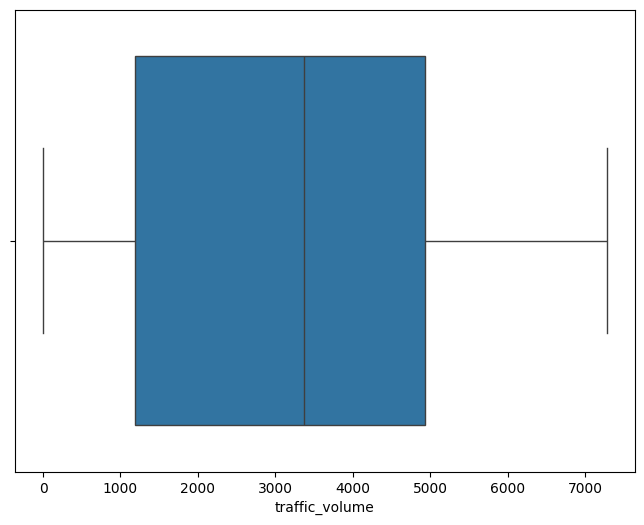

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x='traffic_volume', data = df)
plt.show()
